In [524]:
import pandas as pd
import itertools
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np

In [225]:
df = pd.read_csv('canonical_genes_expression.tsv', sep='\t')

In [226]:
df = df.set_index('Unnamed: 0')
df.index.name = None

In [227]:
cmscaller_res = pd.read_csv('cmscaller_results.csv')

In [228]:
cmscaller_res = cmscaller_res.set_index('Unnamed: 0')
cmscaller_res.index.name = None

In [229]:
pred = cmscaller_res[['prediction']]

In [230]:
pred = pred.transpose()

In [231]:
dfm = pd.concat([df, pred])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [526]:
dfm

,00ae9ab8-6eaa-4085-af72-26f96df97fa3,00cdff29-697a-4a17-ba67-cf55c006b827,01947597-c83a-4c5d-8a45-f1fe27992ad5,0194feb1-d8be-45e5-9b95-0596090e9ecc,019bfec7-ec6c-4cd6-808b-3e6e058e55f9,01d414a2-2b77-41e8-8622-98b277f5dc85,02033780-6bc1-407d-bd0f-45b6d74ae87b,0228ad1c-d5ac-4938-9157-4f7738edf233,025bf99d-1e89-43f3-b0b7-8dfe5d43e192,026818a6-8180-4d9c-9357-b88a832b374e,...,fdceffa7-a393-45e6-98f2-f3292d1a38ea,fdd8e1d5-7004-419d-aaa3-d759799be4b7,fe1af065-a8a2-43c0-82a8-8b8f2ee217a1,ff05f6eb-bec7-48b8-a468-d286e2b76986,ff119a75-c47a-40bd-ac85-95725e40629a,ff2dac33-4531-4e98-8da4-959ec3443552,ff4233e9-37c2-43d5-b4c5-99a6d3878d3f,ff710149-0fc6-464a-93cb-e3b9bdcf3525,ff9b1f41-8be4-42d2-b2bd-96bcedc57f03,ffc0e668-4fc8-4278-abcd-67f7b57839c9
APC,high,1459.0,1773.0,414.0,low,low,975.0,3700.0,low,1215.0,...,low,1313.0,high,1821.0,low,532.0,875.0,low,2133.0,low
BRAF,3212.0,low,low,low,low,1167.0,low,high,972.0,low,...,low,1108.0,5403.0,1797.0,low,539.0,1060.0,low,low,low
CCAT2,low,low,low,low,low,low,low,low,low,low,...,low,low,low,low,low,low,low,low,low,low
COLCA2,low,low,low,low,low,low,low,low,low,low,...,low,low,low,low,low,low,low,low,low,low
GALNT12,2927.0,high,2572.0,high,low,low,1013.0,4044.0,1429.0,high,...,high,1033.0,high,2242.0,1744.0,low,1038.0,687.0,low,low
KRAS,high,2680.0,2449.0,high,low,high,high,3132.0,high,high,...,182.0,1089.0,low,2338.0,2080.0,763.0,high,high,1309.0,2131.0
MLH1,4283.0,low,1467.0,low,263.0,1302.0,low,low,1119.0,low,...,high,848.0,4008.0,1823.0,1686.0,low,954.0,high,low,2299.0
MLH3,5418.0,low,low,low,low,1543.0,low,low,low,low,...,197.0,1258.0,6326.0,1478.0,1528.0,598.0,low,446.0,low,1219.0
PIK3CA,4179.0,low,low,low,low,low,low,3671.0,low,low,...,low,992.0,low,2493.0,low,low,1203.0,low,1863.0,low
SMAD2,high,high,2334.0,high,485.0,high,high,high,high,high,...,334.0,1480.0,high,high,high,high,high,high,high,2224.0


In [479]:
# removing DCC - it's in underexpressed in every sample
dfm = dfm.drop('DCC', axis=0)

In [527]:
df1 = pd.DataFrame(columns=['cms', 'high', 'low', 'high_number', 'low_number', 'combined_number'])

for col in dfm.columns:
    cms = dfm.loc['prediction'][col]
    gene = dfm[col].index
    high = dfm[dfm[col] == 'high'].index.to_list()
    low = dfm[dfm[col] == 'low'].index.to_list()
    df1.loc[col] = [cms, high, low, len(high), len(low), len(high)+len(low)]

In [537]:
low_genes = ['KRAS', 'APC', 'DCC', 'TFGBR2', 'SMAD2', 'SMAD4', 'BAX', 'P53', 'MLH1', 'MLH2']
high_genes = ['MLH3', 'BRAF', 'PIK3CA', 'COLCA2', 'GALNT12']

In [530]:
d = {}

for idx,row in df1.iterrows():
    com = list(set(df1.loc[idx]['high']) & set(high_genes)) + list(set(df1.loc[idx]['low']) & set(low_genes))
    cms = df1.loc[idx]['cms']
    d[idx] = [cms, com]

df3 = pd.DataFrame.from_dict(d)
df3 = df3.transpose()
df3.columns=['cms', 'genes']

In [532]:
df3['genes'] = df3['genes'].apply(str)

In [536]:
df3.groupby(['cms', 'genes']).size()
# df3.groupby(['cms', 'genes']).size().sort_values(ascending=False)

cms   genes                              
CMS1  ['APC', 'MLH1']                        12
      ['APC']                                 6
      ['GALNT12', 'APC', 'MLH1']              7
      ['GALNT12', 'APC']                      1
      ['GALNT12', 'MLH1']                    15
      ['GALNT12', 'SMAD4']                    1
      ['MLH1', 'SMAD4']                       2
      ['MLH1']                               25
      ['MLH3', 'MLH1']                        1
      []                                      6
CMS2  ['APC', 'KRAS']                         1
      ['APC', 'MLH1']                         5
      ['APC']                                43
      ['BRAF', 'MLH1', 'SMAD4']               1
      ['BRAF']                                1
      ['GALNT12', 'APC', 'KRAS']              1
      ['GALNT12', 'APC', 'MLH1', 'SMAD2']     1
      ['GALNT12', 'APC', 'MLH1']              3
      ['GALNT12', 'APC', 'SMAD4']             1
      ['GALNT12', 'APC']                     1

In [533]:
df4 = pd.DataFrame({'cnt' : df3.groupby(['cms', 'genes']).size()}).reset_index()

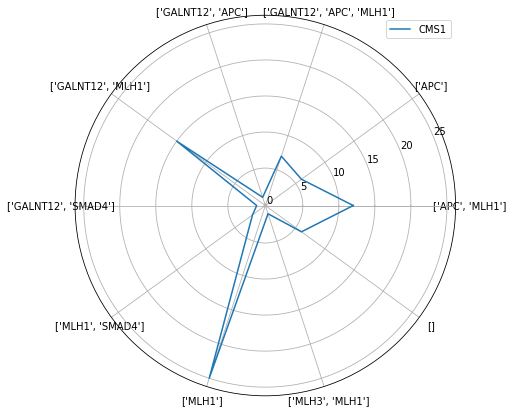

In [534]:
plt.figure(figsize=(7,7))
plt.subplot(polar=True)

cms1 = df4[df4.cms == 'CMS1']
plt.plot(np.linspace(start=0, stop=2 * np.pi, num=len(cms1.cnt)+1), np.r_[cms1.cnt, cms1.cnt[0]], label='CMS1')
lines, labels = plt.thetagrids(np.degrees(np.linspace(start=0, stop=2 * np.pi, num=len(cms1.cnt)+1)), labels=cms1.genes)
    
plt.legend()

In [270]:
df1['high'] = df1['high'].apply(str)
df1['low'] = df1['low'].apply(str)

In [538]:
for idx,row in df1.iterrows():
    high = df1.loc[idx]['high']
    low = df1.loc[idx]['low']
    comb = list(itertools.product(high, low))
    print(high)
    print(low)
    print(comb)
    if set(high).issubset(high_genes) and set(low).issubset(low_genes):
        print('done')
    break

['APC', 'KRAS', 'SMAD2', 'SMAD4']
['CCAT2', 'COLCA2']
[('APC', 'CCAT2'), ('APC', 'COLCA2'), ('KRAS', 'CCAT2'), ('KRAS', 'COLCA2'), ('SMAD2', 'CCAT2'), ('SMAD2', 'COLCA2'), ('SMAD4', 'CCAT2'), ('SMAD4', 'COLCA2')]


In [277]:
df1

,cms,high,low,high_number,low_number,combined_number
00ae9ab8-6eaa-4085-af72-26f96df97fa3,NaN,"[APC, KRAS, SMAD2, SMAD4]","[CCAT2, COLCA2, DCC]",4,3,7
00cdff29-697a-4a17-ba67-cf55c006b827,CMS2,"[GALNT12, SMAD2, TGFBR2]","[BRAF, CCAT2, COLCA2, DCC, MLH1, MLH3, PIK3CA]",3,7,10
01947597-c83a-4c5d-8a45-f1fe27992ad5,CMS4,[TGFBR2],"[BRAF, CCAT2, COLCA2, DCC, MLH3, PIK3CA]",1,6,7
0194feb1-d8be-45e5-9b95-0596090e9ecc,CMS2,"[GALNT12, KRAS, SMAD2, TGFBR2]","[BRAF, CCAT2, COLCA2, DCC, MLH1, MLH3, PIK3CA]",4,7,11
019bfec7-ec6c-4cd6-808b-3e6e058e55f9,CMS4,"[SMAD4, TGFBR2]","[APC, BRAF, CCAT2, COLCA2, DCC, GALNT12, KRAS,...",2,9,11


In [237]:
d = {}

for cms in list(df1['cms'].unique()):
    d[cms] = df1[df1.cms== cms]['high'].value_counts()
    
df_high = pd.DataFrame.from_dict(d)
df_high = df_high.transpose()

In [238]:
d = {}

for cms in list(df1['cms'].unique()):
    d[cms] = df1[df1.cms== cms]['low'].value_counts()
    
df_low = pd.DataFrame.from_dict(d)
df_low = df_low.transpose()

In [240]:
df_high

,"['APC', 'KRAS', 'SMAD2', 'SMAD4', 'TGFBR2']","['APC', 'MLH3', 'SMAD2', 'TGFBR2']","['APC', 'SMAD2', 'TGFBR2']","['APC', 'TGFBR2']","['BRAF', 'SMAD2', 'TGFBR2']","['BRAF', 'TGFBR2']","['GALNT12', 'KRAS', 'MLH1', 'TGFBR2']","['GALNT12', 'KRAS', 'SMAD2', 'SMAD4', 'TGFBR2']","['GALNT12', 'KRAS', 'SMAD2', 'SMAD4']","['GALNT12', 'KRAS', 'SMAD2', 'TGFBR2']",...,"['KRAS', 'SMAD4', 'TGFBR2']","['KRAS', 'TGFBR2']","['MLH1', 'SMAD2', 'SMAD4', 'TGFBR2']","['MLH1', 'SMAD2', 'TGFBR2']","['MLH3', 'SMAD2', 'TGFBR2']","['PIK3CA', 'SMAD2', 'TGFBR2']","['SMAD2', 'SMAD4', 'TGFBR2']","['SMAD2', 'TGFBR2']","['SMAD4', 'TGFBR2']",['TGFBR2']
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CMS2,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,3.0,...,NaN,3.0,1.0,1.0,NaN,NaN,8.0,18.0,2.0,7.0
CMS4,NaN,2.0,NaN,2.0,NaN,NaN,NaN,1.0,NaN,3.0,...,NaN,4.0,NaN,NaN,NaN,1.0,11.0,36.0,2.0,16.0
CMS1,4.0,NaN,NaN,NaN,NaN,NaN,NaN,14.0,4.0,2.0,...,1.0,2.0,NaN,NaN,1.0,NaN,9.0,4.0,NaN,NaN
CMS3,NaN,NaN,1.0,NaN,NaN,NaN,NaN,7.0,1.0,23.0,...,NaN,1.0,NaN,NaN,NaN,NaN,4.0,6.0,NaN,NaN


In [241]:
df_low

,"['APC', 'BRAF', 'CCAT2', 'COLCA2', 'DCC', 'GALNT12', 'KRAS', 'MLH3', 'PIK3CA']","['APC', 'BRAF', 'CCAT2', 'COLCA2', 'DCC', 'GALNT12', 'MLH1', 'MLH3', 'PIK3CA', 'SMAD4']","['APC', 'BRAF', 'CCAT2', 'COLCA2', 'DCC', 'GALNT12', 'MLH1', 'MLH3', 'PIK3CA']","['APC', 'BRAF', 'CCAT2', 'COLCA2', 'DCC', 'GALNT12', 'MLH1', 'PIK3CA']","['APC', 'BRAF', 'CCAT2', 'COLCA2', 'DCC', 'GALNT12', 'MLH3', 'PIK3CA', 'SMAD4']","['APC', 'BRAF', 'CCAT2', 'COLCA2', 'DCC', 'GALNT12', 'MLH3', 'PIK3CA']","['APC', 'BRAF', 'CCAT2', 'COLCA2', 'DCC', 'GALNT12', 'MLH3']","['APC', 'BRAF', 'CCAT2', 'COLCA2', 'DCC', 'GALNT12', 'PIK3CA']","['APC', 'BRAF', 'CCAT2', 'COLCA2', 'DCC', 'GALNT12']","['APC', 'BRAF', 'CCAT2', 'COLCA2', 'DCC', 'KRAS', 'MLH3', 'PIK3CA']",...,"['CCAT2', 'COLCA2', 'DCC', 'MLH1', 'PIK3CA']","['CCAT2', 'COLCA2', 'DCC', 'MLH1', 'SMAD4']","['CCAT2', 'COLCA2', 'DCC', 'MLH1']","['CCAT2', 'COLCA2', 'DCC', 'MLH3', 'PIK3CA', 'SMAD2']","['CCAT2', 'COLCA2', 'DCC', 'MLH3', 'PIK3CA', 'SMAD4']","['CCAT2', 'COLCA2', 'DCC', 'MLH3', 'PIK3CA']","['CCAT2', 'COLCA2', 'DCC', 'MLH3']","['CCAT2', 'COLCA2', 'DCC', 'PIK3CA', 'SMAD4']","['CCAT2', 'COLCA2', 'DCC', 'PIK3CA']","['CCAT2', 'COLCA2', 'DCC']"
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CMS2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,2.0,...,NaN,1.0,NaN,1.0,NaN,3.0,2.0,1.0,1.0,1.0
CMS4,1.0,2.0,8.0,NaN,1.0,3.0,3.0,NaN,1.0,2.0,...,NaN,1.0,NaN,NaN,1.0,3.0,2.0,1.0,NaN,NaN
CMS1,NaN,NaN,2.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,1.0,NaN,4.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
CMS3,NaN,NaN,2.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [541]:
dfm_low = dfm[dfm.index.isin(low_genes)]

In [542]:
dfm_high = dfm[dfm.index.isin(high_genes)]

In [544]:
df1_low = pd.DataFrame(columns=['cms', 'low', 'low_number'])

for col in dfm_low.columns:
    cms = dfm_low.loc['prediction'][col]
    low = dfm_low[dfm_low[col] == 'low'].index.to_list()
    df1_low.loc[col] = [cms, low, len(low)]

KeyError: 'prediction'

In [220]:
df1_high = pd.DataFrame(columns=['cms', 'high', 'high_number'])

for col in dfm_high.columns:
    cms = dfm_high.loc['prediction'][col]
    high = dfm_high[dfm_high[col] == 'high'].index.to_list()
    df1_high.loc[col] = [cms, high, len(high)]

In [247]:
df1_low['low'] = df1_low['low'].apply(str)
df1_high['high'] = df1_high['high'].apply(str)

In [250]:
d = {}

for cms in list(df1_high['cms'].unique()):
    d[cms] = df1_high[df1_high.cms== cms]['high'].value_counts()
    
df_high = pd.DataFrame.from_dict(d)
df_high = df_high.transpose()